# Imcome Dataset : Unsupervise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\GIT\income_dataset\income.csv")

In [3]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
df.shape

(22, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22 non-null     object
 1   Age     22 non-null     int64 
 2   Income  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [6]:
df.isnull().sum()

Name      0
Age       0
Income    0
dtype: int64

In [7]:
df.describe()

,Age,Income
count,22.000000,22.000000
mean,34.818182,90704.545455
std,5.901060,43953.075382
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


In [8]:
df.drop(["Name"],axis=1,inplace=True)

In [9]:
df.head()

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


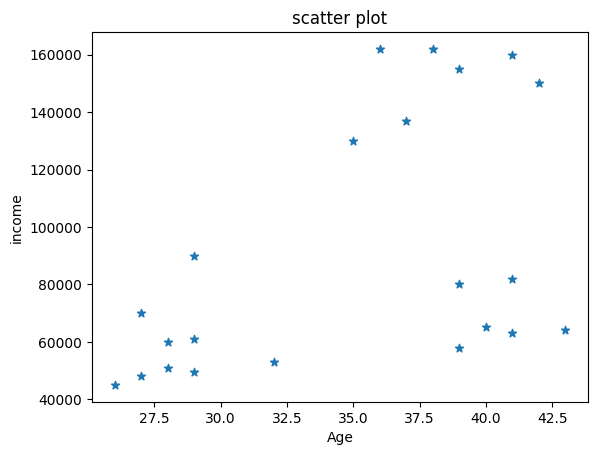

In [10]:
plt.scatter(df["Age"],df["Income"],marker="*")
plt.xlabel("Age")
plt.ylabel("income")
plt.title("scatter plot")
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [12]:
df["Age"] = scale.fit_transform(df[["Age"]]) 

In [13]:
df["Income"] = scale.fit_transform(df[["Income"]]) 

In [43]:
X=df[["Age","Income"]]

In [45]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [46]:
model.fit(X)

KMeans(n_clusters=3)

In [48]:
df["cluster"]=model.predict(X)

In [50]:
df0 = df[df["cluster"]==0]
df0

,Age,Income,cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
11,0.000000,0.000000,0
12,0.058824,0.025641,0
13,0.117647,0.051282,0
14,0.176471,0.038462,0
15,0.352941,0.068376,0


In [51]:
df1 = df[df["cluster"]==1]
df1

,Age,Income,cluster
16,0.823529,0.170940,1
17,0.882353,0.153846,1
18,1.000000,0.162393,1
19,0.764706,0.299145,1
20,0.882353,0.316239,1
21,0.764706,0.111111,1


In [52]:
df2 = df[df["cluster"]==2]
df2

,Age,Income,cluster
4,0.941176,0.897436,2
5,0.764706,0.940171,2
6,0.882353,0.982906,2
7,0.705882,1.000000,2
8,0.588235,1.000000,2
9,0.529412,0.726496,2
10,0.647059,0.786325,2


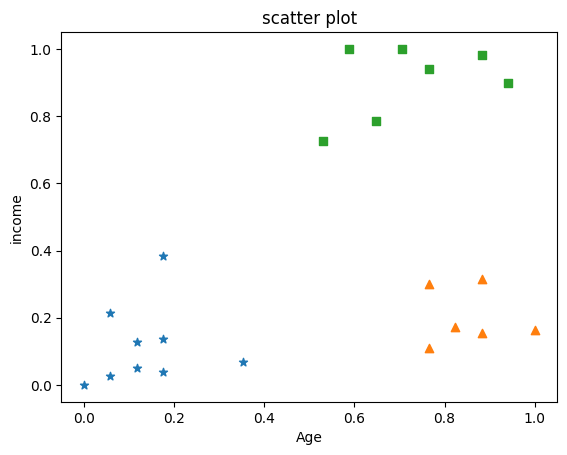

In [53]:
plt.scatter(df0["Age"],df0["Income"],marker="*")
plt.scatter(df1["Age"],df1["Income"],marker="^")
plt.scatter(df2["Age"],df2["Income"],marker="s")
plt.xlabel("Age")
plt.ylabel("income")
plt.title("scatter plot")
plt.show()

In [54]:
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.9047619 ]])

In [57]:
model.cluster_centers_[:,0]

array([0.1372549 , 0.85294118, 0.72268908])

In [56]:
model.cluster_centers_[:,1]

array([0.11633428, 0.2022792 , 0.9047619 ])

In [58]:
model.inertia_

0.48259220352300947